In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

daily_auckland_weather = pd.read_csv("../AucklandMotatStationNiwa_08June24/motatstation_weather_auckland_2016_2024.csv", index_col='Date', parse_dates=True)
daily_auckland_weather.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,37.7
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,37.8


In [166]:
daily_auckland_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2939 entries, 2016-03-01 to 2024-03-17
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

In [167]:
print(daily_auckland_weather.head())
print(daily_auckland_weather.tail())

            WDir(Deg)  WSpd(m/s)  GustDir(Deg)  GustSpd(m/s)  WindRun(Km)  \
Date                                                                        
2016-03-01      188.0        1.2          65.0           7.2        172.0   
2016-03-02      157.0        3.2          60.0           9.3        258.0   
2016-03-03      134.0        1.9          67.0          10.8        214.0   
2016-03-04      147.0        1.3          38.0           6.2        134.0   
2016-03-05      131.0        0.4         197.0           9.3        187.0   

            Rain(mm)  Tdry(c)  Twet(c)  RH(%)  Tmax(c)  ...  ET10©  ET20©  \
Date                                                    ...                 
2016-03-01       1.8     19.2     18.5   93.0     22.4  ...   21.3   22.2   
2016-03-02       0.0     17.9     16.1   82.0     23.5  ...   20.4   21.7   
2016-03-03       0.0     18.3     15.7   75.0     23.1  ...   19.5   20.9   
2016-03-04       0.0     19.4     16.1   69.0     24.8  ...   19.9   21.2  

In [168]:
daily_auckland_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2939 entries, 2016-03-01 to 2024-03-17
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

In [169]:
daily_auckland_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2939 entries, 2016-03-01 to 2024-03-17
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WDir(Deg)        2939 non-null   float64
 1   WSpd(m/s)        2939 non-null   float64
 2   GustDir(Deg)     2939 non-null   float64
 3   GustSpd(m/s)     2939 non-null   float64
 4   WindRun(Km)      2939 non-null   float64
 5   Rain(mm)         2939 non-null   float64
 6   Tdry(c)          2939 non-null   float64
 7   Twet(c)          2939 non-null   float64
 8   RH(%)            2939 non-null   float64
 9   Tmax(c)          2939 non-null   float64
 10  Tmin(c)          2939 non-null   float64
 11  Tgmin(C)         2939 non-null   float64
 12  ET10©            2939 non-null   float64
 13  ET20©            2939 non-null   float64
 14  ET100©           2939 non-null   float64
 15  Pmsl(hPa)        2939 non-null   float64
 16  Pstn(hPa)        2939 non-null   float64
 

In [170]:
daily_auckland_weather.isna().sum()

WDir(Deg)          0
WSpd(m/s)          0
GustDir(Deg)       0
GustSpd(m/s)       0
WindRun(Km)        0
Rain(mm)           0
Tdry(c)            0
Twet(c)            0
RH(%)              0
Tmax(c)            0
Tmin(c)            0
Tgmin(C)           0
ET10©              0
ET20©              0
ET100©             0
Pmsl(hPa)          0
Pstn(hPa)          0
Sun(Hrs)           0
Rad(MJ/m2)         0
Tavg               0
Evaporation(mm)    0
SoilMoist(%)       0
dtype: int64

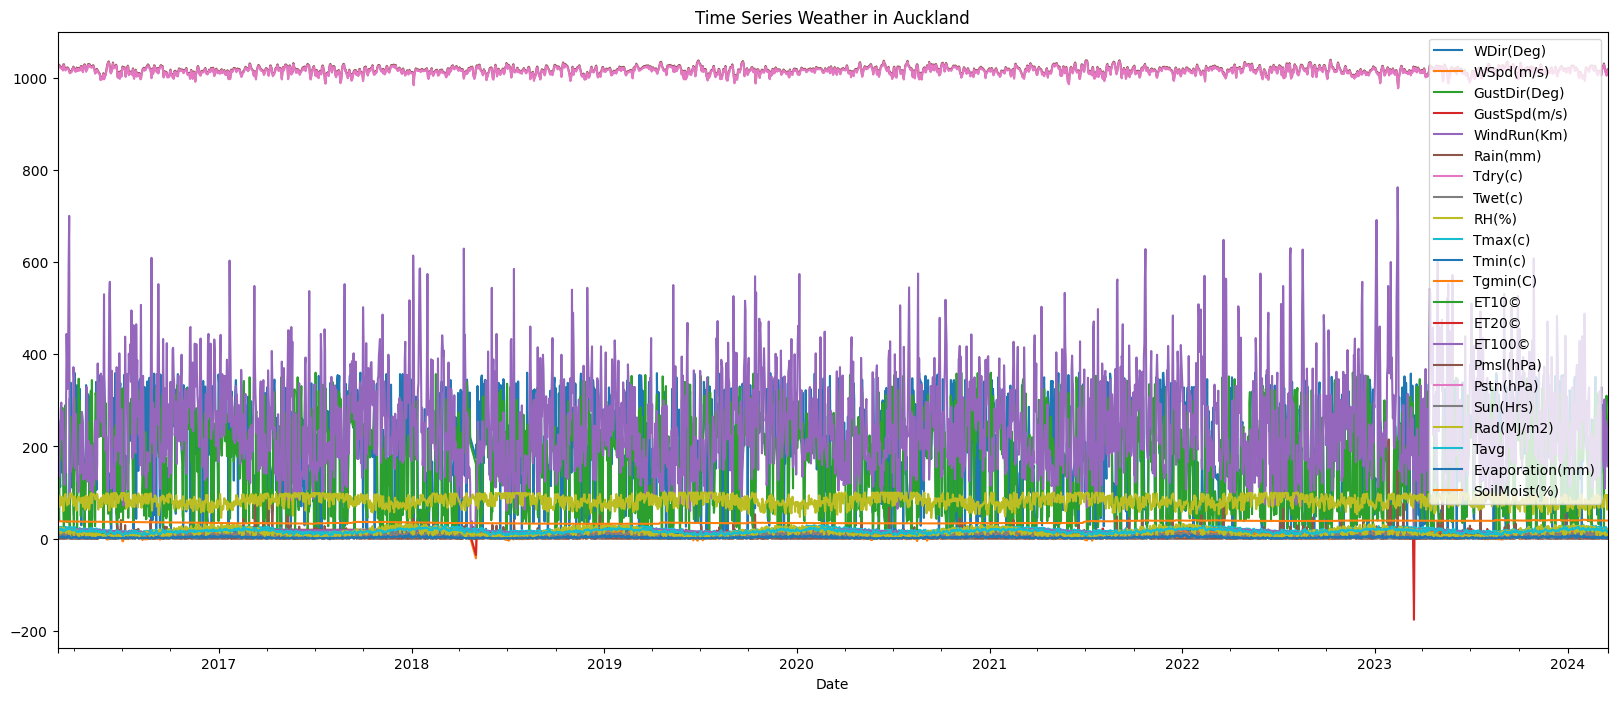

In [171]:
# Visual Inspection to choose between additive and multiplicative method for the Holt-Winters model
import matplotlib.pyplot as plt


daily_auckland_weather.plot(title='Time Series Weather in Auckland', figsize=(20,8))
plt.show()


In [172]:
daily_means  = daily_auckland_weather.resample('D').mean()
monthly_means  = daily_auckland_weather.resample('M').mean()
quater_means = daily_auckland_weather.resample('Q').mean()
annual_means = daily_auckland_weather.resample('A').mean()



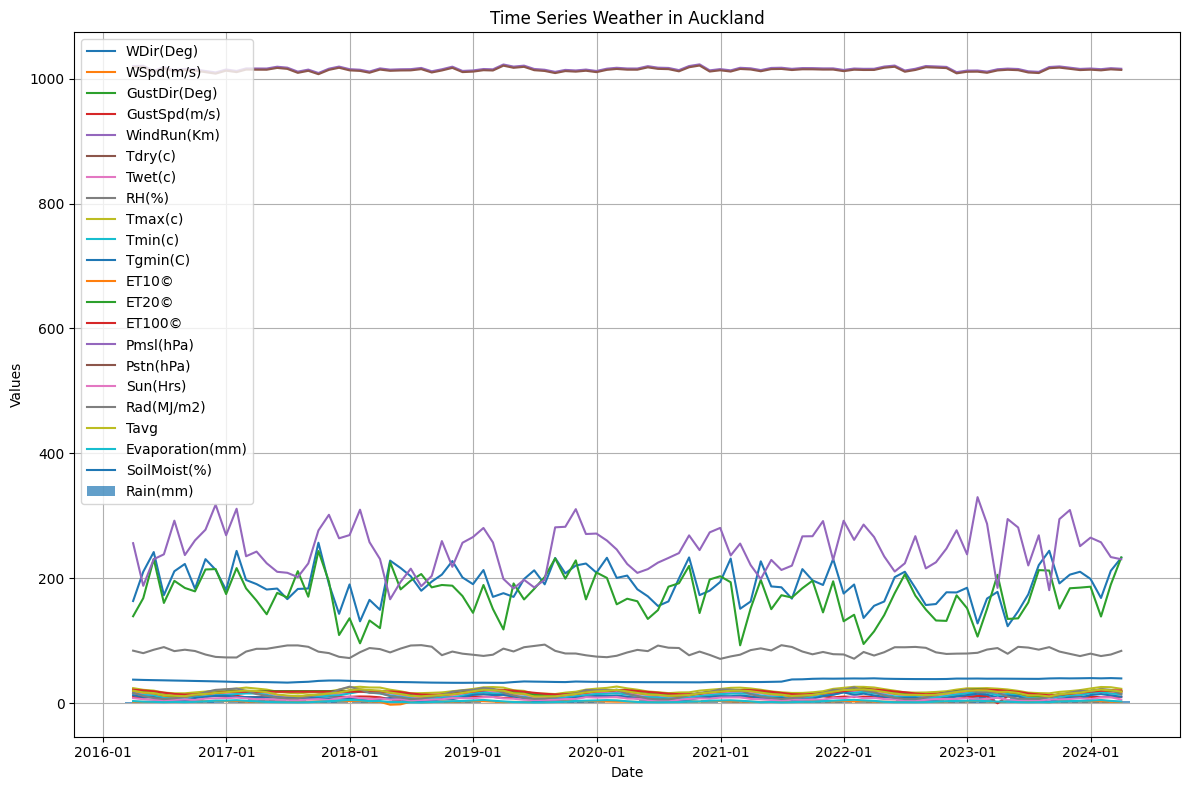

In [173]:
import matplotlib.dates as mdates

high_variable = ['WDir(Deg)', 'WSpd(m/s)','GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)']
plt.figure(figsize=(12, 8))
for column in monthly_means.columns:
    if column == 'Rain(mm)':  # Plot Rainfall as a bar plot
        plt.bar(monthly_means.index, monthly_means[column], width=50, label=column, alpha=0.7)
    elif column == high_variable:  # Plot the identified high variable separately with a different color
        plt.plot(monthly_means.index, monthly_means[column], label=f'{column} (High)', color='red')
    else:
        plt.plot(monthly_means.index, monthly_means[column], label=column)
        
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title('Time Series Weather in Auckland')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(loc='upper left') 
plt.grid(True)

plt.tight_layout()
plt.show()

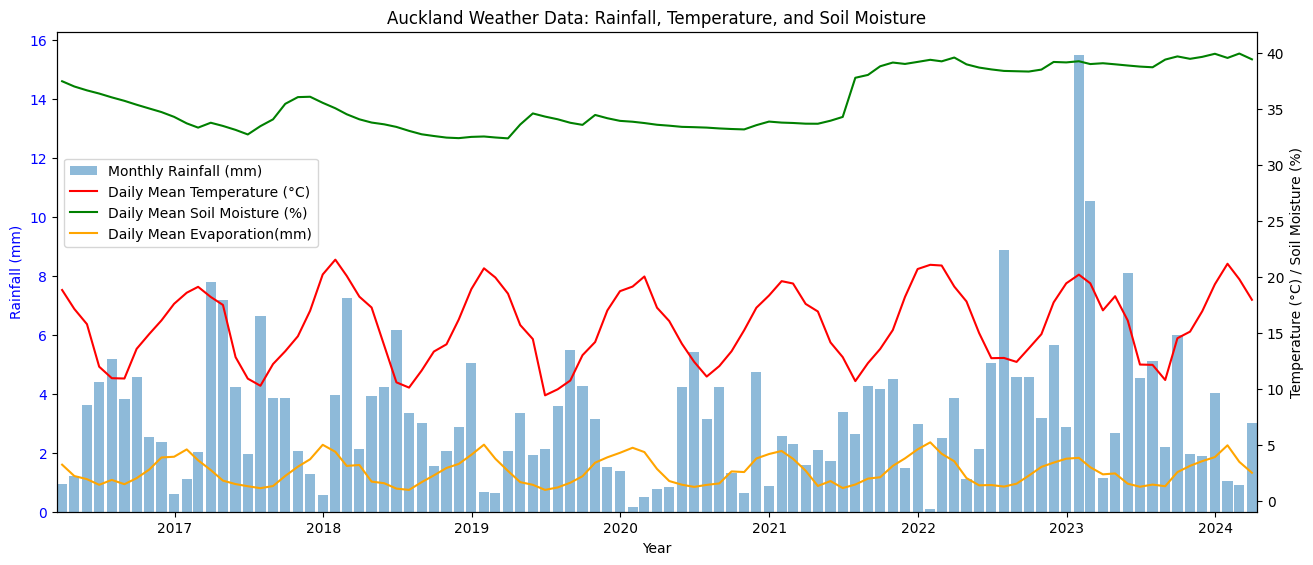

In [174]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(monthly_means.index, monthly_means['Rain(mm)'], width=25, label='Monthly Rainfall (mm)',  alpha=0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.margins(x=0)

ax2 = ax1.twinx()
ax2.plot(monthly_means.index, monthly_means['Tdry(c)'], label='Daily Mean Temperature (°C)', color='r')
ax2.plot(monthly_means.index, monthly_means['SoilMoist(%)'], label='Daily Mean Soil Moisture (%)', color='g')
ax2.plot(monthly_means.index, monthly_means['Evaporation(mm)'], label='Daily Mean Evaporation(mm)', color='orange')
ax2.set_ylabel('Temperature (°C) / Soil Moisture (%)')
ax2.tick_params(axis='y')
ax2.margins(x=0)

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.7))
plt.xticks(rotation=45)
plt.title('Auckland Weather Data: Rainfall, Temperature, and Soil Moisture')
# plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()

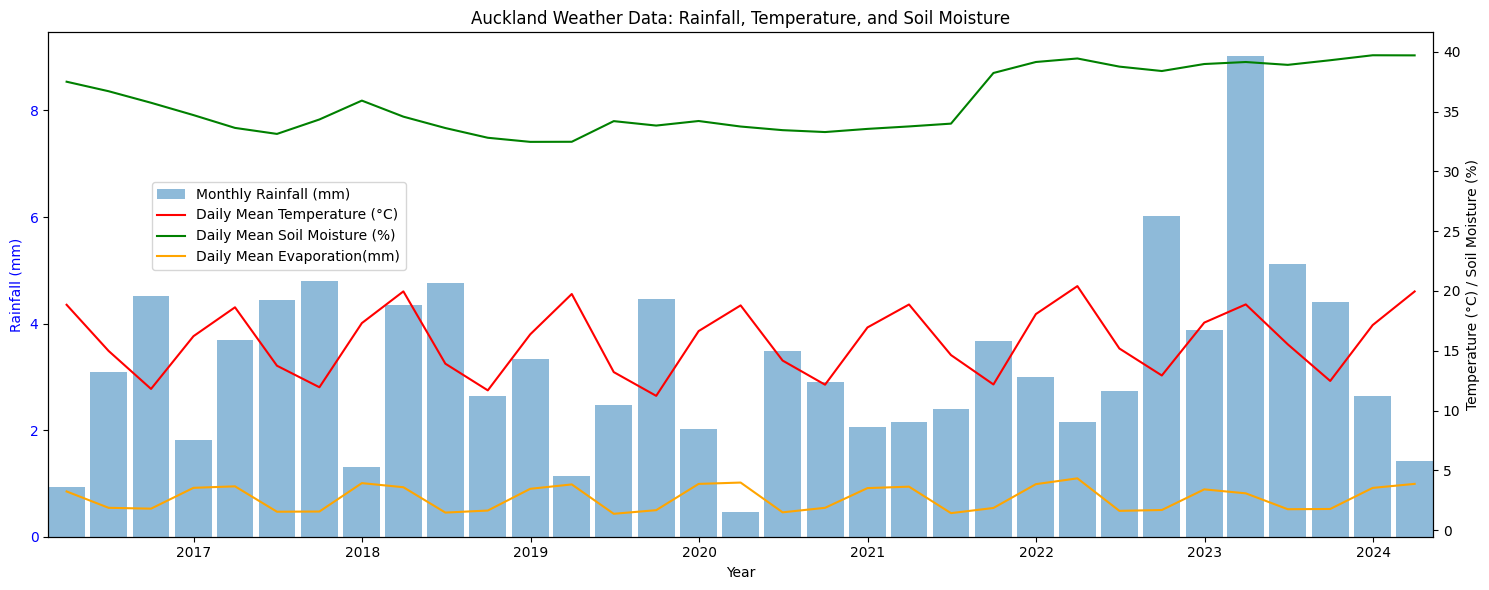

In [175]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(quater_means.index, quater_means['Rain(mm)'], width=80, label='Monthly Rainfall (mm)',  alpha=0.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.margins(x=0)
ax2 = ax1.twinx()
ax2.plot(quater_means.index, quater_means['Tdry(c)'], label='Daily Mean Temperature (°C)', color='r')
ax2.plot(quater_means.index, quater_means['SoilMoist(%)'], label='Daily Mean Soil Moisture (%)', color='g')
ax2.plot(quater_means.index, quater_means['Evaporation(mm)'], label='Daily Mean Evaporation(mm)', color='orange')

ax2.set_ylabel('Temperature (°C) / Soil Moisture (%)')
ax2.tick_params(axis='y')
ax2.margins(x=0)

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.7))
plt.xticks(rotation=45)
plt.title('Auckland Weather Data: Rainfall, Temperature, and Soil Moisture')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.tight_layout()
plt.show()

Basic Forecast Models

In [176]:
daily_auckland_weather.index.freq = 'D'
daily_auckland_weather.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-01,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,22.4,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
2016-03-02,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,23.5,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2016-03-03,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,23.1,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6
2016-03-04,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,24.8,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,37.7
2016-03-05,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,25.6,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,37.8


In [177]:
2939 /100 * 80

2351.2

In [178]:
2939 /100 * 20

587.8

In [179]:
train_data = daily_auckland_weather.iloc[:2470]
test_data = daily_auckland_weather.iloc[2469:]

In [180]:
daily_auckland_weather.columns

Index(['WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)',
       'Rain(mm)', 'Tdry(c)', 'Twet(c)', 'RH(%)', 'Tmax(c)', 'Tmin(c)',
       'Tgmin(C)', 'ET10©', 'ET20©', 'ET100©', 'Pmsl(hPa)', 'Pstn(hPa)',
       'Sun(Hrs)', 'Rad(MJ/m2)', 'Tavg', 'Evaporation(mm)', 'SoilMoist(%)'],
      dtype='object')

In [181]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

target_variable = 'SoilMoist(%)'

fitted_model = ExponentialSmoothing(train_data[target_variable], trend='mul', seasonal='mul', seasonal_periods=90).fit()


test_predictions = fitted_model.forecast(steps=31)
test_predictions

2022-12-05    39.188424
2022-12-06    39.181569
2022-12-07    39.178968
2022-12-08    39.188376
2022-12-09    39.200194
2022-12-10    39.201298
2022-12-11    39.199096
2022-12-12    39.229630
2022-12-13    39.253491
2022-12-14    39.313774
2022-12-15    39.330378
2022-12-16    39.317337
2022-12-17    39.273987
2022-12-18    39.263982
2022-12-19    39.284321
2022-12-20    39.353312
2022-12-21    39.363720
2022-12-22    39.374542
2022-12-23    39.375945
2022-12-24    39.412032
2022-12-25    39.421919
2022-12-26    39.436170
2022-12-27    39.508129
2022-12-28    39.527724
2022-12-29    39.530368
2022-12-30    39.542309
2022-12-31    39.564425
2023-01-01    39.602864
2023-01-02    39.582836
2023-01-03    39.575287
2023-01-04    39.583533
Freq: D, dtype: float64

In [182]:
test_predictions.tail()

2022-12-31    39.564425
2023-01-01    39.602864
2023-01-02    39.582836
2023-01-03    39.575287
2023-01-04    39.583533
Freq: D, dtype: float64

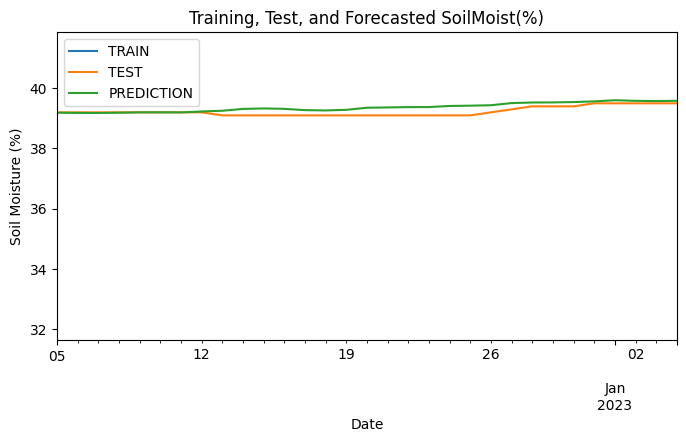

In [183]:
train_size = int(len(daily_auckland_weather) * 0.7)
train_data = daily_auckland_weather.iloc[:train_size]
test_data = daily_auckland_weather.iloc[train_size:]

train_data['SoilMoist(%)'].plot(legend=True, label="TRAIN", figsize=(8, 4))
test_data['SoilMoist(%)'].plot(legend=True, label="TEST")
test_predictions.plot(legend=True, label="PREDICTION", xlim=['2022-12-05', '2023-01-04'])


plt.title('Training, Test, and Forecasted SoilMoist(%)')
plt.xlabel('Date')
plt.ylabel('Soil Moisture (%)')
plt.show()

In [184]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [185]:
# mean_squared_error(test_data, test_predictions)

In [186]:
# mean_absolute_error(test_data, test_predictions)


In [187]:
# np.sqrt(mean_squared_error(test_data, test_predictions))

In [188]:
final_model = ExponentialSmoothing(daily_auckland_weather['SoilMoist(%)'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [189]:
forecast_predictions = final_model.forecast(36)

<Axes: xlabel='Date'>

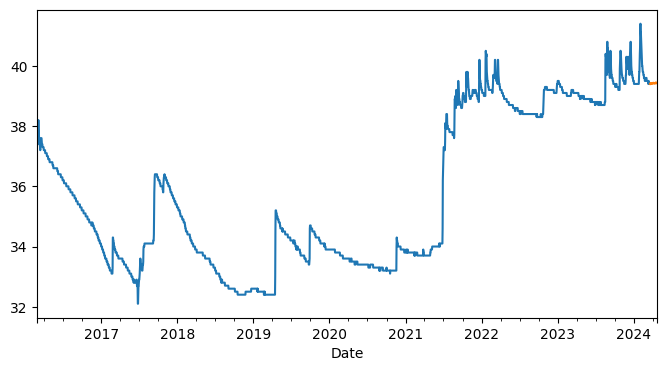

In [190]:
daily_auckland_weather['SoilMoist(%)'].plot(figsize=(8,4))
forecast_predictions.plot()

In [191]:
daily_auckland_weather.columns

Index(['WDir(Deg)', 'WSpd(m/s)', 'GustDir(Deg)', 'GustSpd(m/s)', 'WindRun(Km)',
       'Rain(mm)', 'Tdry(c)', 'Twet(c)', 'RH(%)', 'Tmax(c)', 'Tmin(c)',
       'Tgmin(C)', 'ET10©', 'ET20©', 'ET100©', 'Pmsl(hPa)', 'Pstn(hPa)',
       'Sun(Hrs)', 'Rad(MJ/m2)', 'Tavg', 'Evaporation(mm)', 'SoilMoist(%)'],
      dtype='object')

In [274]:
# Create lag features function
def create_lag_features(data, columns, lag_days):
    for col in columns:
        for lag in lag_days:
            if lag > 0:
                data[f'lag_{col}_{lag}'] = data[col].shift(lag)
    data.dropna(inplace=True)
    return data

subset_columns = ['Rain(mm)', 'Tdry(c)', 'Tmax(c)', 'Tmin(c)', 'Sun(Hrs)', 'Evaporation(mm)', 'SoilMoist(%)'  ]


# Specify columns and lag days
columns_to_lag = [ 'Tdry(c)', 'Rain(mm)', 'Twet(c)', 'RH(%)', 'Tmax(c)', 'Tmin(c)',
       'Tgmin(C)', 'ET10©', 'ET20©', 'ET100©', 'Pmsl(hPa)', 'Pstn(hPa)',
       'Sun(Hrs)', 'Rad(MJ/m2)', 'Tavg', 'Evaporation(mm)']
lag_days = range(1, 15)  # Lag days from 1 to 14

# Create lag features
daily_auckland_weather = create_lag_features(daily_auckland_weather, subset_columns, lag_days)


In [275]:
daily_auckland_weather.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,lag_SoilMoist(%)_5,lag_SoilMoist(%)_6,lag_SoilMoist(%)_7,lag_SoilMoist(%)_8,lag_SoilMoist(%)_9,lag_SoilMoist(%)_10,lag_SoilMoist(%)_11,lag_SoilMoist(%)_12,lag_SoilMoist(%)_13,lag_SoilMoist(%)_14
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-26,225.0,5.0,229.0,15.4,311.0,0.0,18.6,15.1,67.0,20.2,...,37.0,37.0,37.0,37.0,37.0,37.0,37.1,37.1,37.1,37.1
2016-04-27,140.0,0.3,166.0,7.7,124.0,0.0,15.5,14.7,91.0,21.1,...,36.9,37.0,37.0,37.0,37.0,37.0,37.0,37.1,37.1,37.1
2016-04-28,313.0,0.7,246.0,6.2,148.0,0.0,16.1,14.0,78.0,19.1,...,36.9,36.9,37.0,37.0,37.0,37.0,37.0,37.0,37.1,37.1
2016-04-29,287.0,1.2,252.0,8.2,212.0,0.0,16.7,13.5,68.0,18.5,...,36.9,36.9,36.9,37.0,37.0,37.0,37.0,37.0,37.0,37.1
2016-04-30,208.0,2.1,25.0,6.7,136.0,0.0,17.5,13.7,63.0,21.3,...,36.9,36.9,36.9,36.9,37.0,37.0,37.0,37.0,37.0,37.0


Choosing Arima Orders

<Axes: xlabel='Date'>

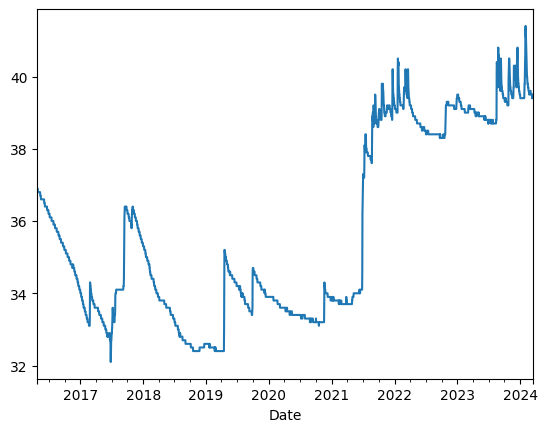

In [276]:
daily_auckland_weather['SoilMoist(%)'].plot()
# look like a stationary data, as they is no train or seasonality

In [277]:
# to calculate if there is a trend
from statsmodels.tsa.statespace.tools import diff
daily_auckland_weather['SoilMoist(%)'] - daily_auckland_weather['SoilMoist(%)'].shift(1)

Date
2016-04-26    NaN
2016-04-27    0.0
2016-04-28    0.0
2016-04-29   -0.1
2016-04-30    0.0
             ... 
2024-03-13    0.0
2024-03-14    0.0
2024-03-15    0.0
2024-03-16    0.0
2024-03-17    0.0
Freq: D, Name: SoilMoist(%), Length: 2883, dtype: float64

<Axes: xlabel='Date'>

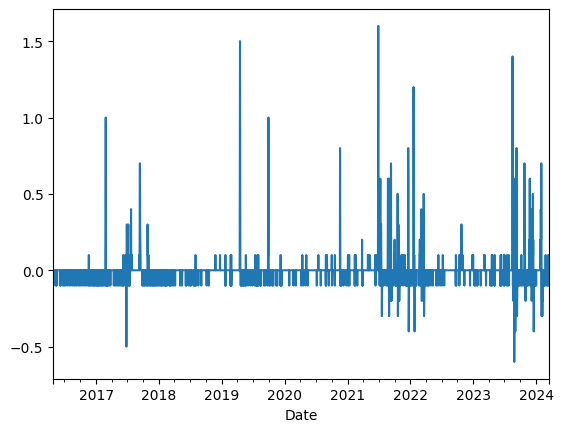

In [278]:
diff(daily_auckland_weather['SoilMoist(%)'], k_diff=1).plot()

In [279]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

# to calculate auto correlation
acf(daily_auckland_weather['SoilMoist(%)'])

array([1.        , 0.9988466 , 0.99723732, 0.99558313, 0.99390351,
       0.99225901, 0.99066509, 0.98913532, 0.98770249, 0.98620679,
       0.98467496, 0.98319734, 0.98173778, 0.98026429, 0.97882538,
       0.97732969, 0.97584896, 0.9743756 , 0.97288248, 0.97136975,
       0.96989574, 0.96844703, 0.96702245, 0.96560859, 0.96415343,
       0.96271737, 0.96128609, 0.95989714, 0.95856497, 0.95728547,
       0.95600765, 0.95469885, 0.9533157 , 0.95194197, 0.95057857])

In [280]:
pacf_yw(daily_auckland_weather['SoilMoist(%)'], nlags=30, method='mle')

array([ 1.00000000e+00,  9.98846597e-01, -1.98311787e-01,  1.95342437e-02,
       -1.24168497e-02,  1.92534450e-02,  1.47558053e-02,  2.05771559e-02,
        3.26859862e-02, -4.46960144e-02, -2.19799208e-03,  2.74589124e-02,
       -5.58371821e-04, -7.69749011e-03,  1.72280230e-02, -3.27843286e-02,
        1.55294002e-02, -1.18651640e-03, -6.12526631e-03, -8.87847900e-03,
        1.85646425e-02,  5.36646981e-03,  3.88920580e-03,  2.36216306e-03,
       -2.01974439e-02,  1.37271305e-02, -2.58614148e-03,  2.30917598e-02,
        1.40119637e-02,  1.51967216e-02, -8.72902549e-03])

In [281]:
pacf_yw(daily_auckland_weather['SoilMoist(%)'], nlags=30, method='mle')

array([ 1.00000000e+00,  9.98846597e-01, -1.98311787e-01,  1.95342437e-02,
       -1.24168497e-02,  1.92534450e-02,  1.47558053e-02,  2.05771559e-02,
        3.26859862e-02, -4.46960144e-02, -2.19799208e-03,  2.74589124e-02,
       -5.58371821e-04, -7.69749011e-03,  1.72280230e-02, -3.27843286e-02,
        1.55294002e-02, -1.18651640e-03, -6.12526631e-03, -8.87847900e-03,
        1.85646425e-02,  5.36646981e-03,  3.88920580e-03,  2.36216306e-03,
       -2.01974439e-02,  1.37271305e-02, -2.58614148e-03,  2.30917598e-02,
        1.40119637e-02,  1.51967216e-02, -8.72902549e-03])

In [282]:
# pacf_yw(daily_auckland_weather['SoilMoist(%)'], nlags=30, method='unbiased')

In [283]:
pacf_ols(daily_auckland_weather['SoilMoist(%)'], nlags=30)

array([ 1.        ,  0.99954392, -0.29690421,  0.06373753, -0.03394955,
        0.04028393,  0.01413792,  0.04466791,  0.02263047, -0.0547629 ,
        0.00234085,  0.04514672, -0.00920625, -0.00774643,  0.02956367,
       -0.0601133 ,  0.04103946,  0.00182078, -0.0158659 , -0.00952275,
        0.03222803,  0.00174345,  0.00315763, -0.00863064, -0.02200379,
        0.02226763,  0.00725018,  0.03457258,  0.01175474,  0.02224362,
       -0.00565288])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

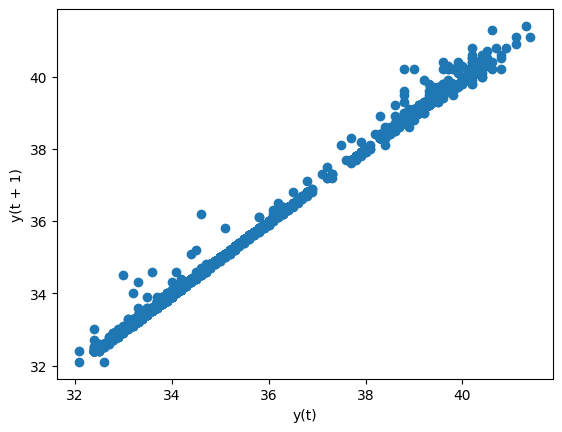

In [284]:
from pandas.plotting import lag_plot
lag_plot(daily_auckland_weather['SoilMoist(%)'])
# ths show very strong of auto correlation --> non stationery dataset

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

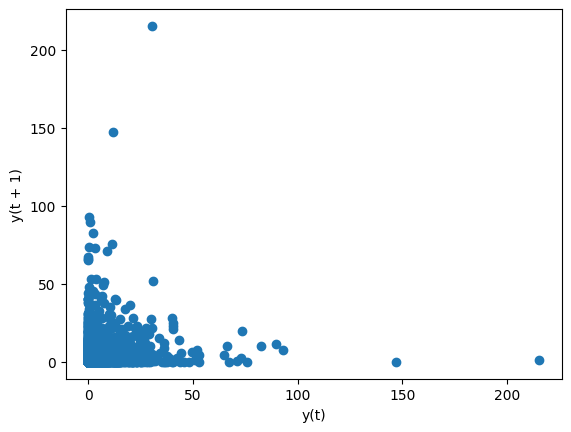

In [285]:
lag_plot(daily_auckland_weather['Rain(mm)'])


In [286]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [287]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [288]:
stepwise_fit = auto_arima(daily_auckland_weather['SoilMoist(%)'], start_P=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5266.933, Time=4.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4994.145, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5256.984, Time=0.94 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5271.666, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4995.935, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5270.291, Time=4.56 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5270.166, Time=3.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5267.693, Time=4.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-5273.533, Time=0.64 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-5272.161, Time=2.92 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-5272.036, Time=1.65 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5258.870, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-5269.562, Time=2.57 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 28.066 seconds


In [289]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2883
Model:               SARIMAX(0, 1, 1)   Log Likelihood                2638.766
Date:                Thu, 27 Jun 2024   AIC                          -5273.533
Time:                        04:22:49   BIC                          -5261.600
Sample:                    04-26-2016   HQIC                         -5269.232
                         - 03-17-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3150      0.006     50.222      0.000       0.303       0.327
sigma2         0.0094   4.52e-05    207.537      0.000       0.009       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):            628662.10
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               3.94   Skew:                             5.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [290]:
stepwise_fit = auto_arima(daily_auckland_weather['SoilMoist(%)'], start_P=0, start_q=0, max_p=6, max_q=3, seasonal=True, trace=True)

Performing stepwise search to minimize aic


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5266.933, Time=2.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4994.145, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5256.984, Time=0.83 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5271.666, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4995.935, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5270.291, Time=3.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-5270.166, Time=5.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5267.693, Time=7.56 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-5273.533, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-5272.161, Time=3.89 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-5272.036, Time=3.65 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5258.870, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-5269.562, Time=3.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 33.694 seconds


In [291]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2883
Model:               SARIMAX(0, 1, 1)   Log Likelihood                2638.766
Date:                Thu, 27 Jun 2024   AIC                          -5273.533
Time:                        04:23:22   BIC                          -5261.600
Sample:                    04-26-2016   HQIC                         -5269.232
                         - 03-17-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3150      0.006     50.222      0.000       0.303       0.327
sigma2         0.0094   4.52e-05    207.537      0.000       0.009       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):            628662.10
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               3.94   Skew:                             5.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [292]:
stepwise_fit = auto_arima(daily_auckland_weather['SoilMoist(%)'], start_p=0, start_q=0, max_p=0,max_q=4, seasonal=True, trace=True, m=14)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[14] intercept   : AIC=-4995.087, Time=7.09 sec
 ARIMA(0,1,0)(0,0,0)[14] intercept   : AIC=-4994.145, Time=0.26 sec
 ARIMA(0,1,0)(1,0,0)[14] intercept   : AIC=-4996.047, Time=1.15 sec
 ARIMA(0,1,1)(0,0,1)[14] intercept   : AIC=-5279.246, Time=4.96 sec
 ARIMA(0,1,0)(0,0,0)[14]             : AIC=-4995.935, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[14] intercept   : AIC=-5271.666, Time=3.25 sec
 ARIMA(0,1,1)(1,0,1)[14] intercept   : AIC=-5277.717, Time=8.52 sec
 ARIMA(0,1,1)(0,0,2)[14] intercept   : AIC=-5278.404, Time=10.71 sec
 ARIMA(0,1,1)(1,0,0)[14] intercept   : AIC=-5278.776, Time=3.98 sec
 ARIMA(0,1,1)(1,0,2)[14] intercept   : AIC=-5277.728, Time=26.14 sec
 ARIMA(0,1,0)(0,0,1)[14] intercept   : AIC=-4996.325, Time=0.86 sec
 ARIMA(0,1,2)(0,0,1)[14] intercept   : AIC=-5277.805, Time=4.13 sec
 ARIMA(0,1,1)(0,0,1)[14]             : AIC=-5281.128, Time=1.81 sec
 ARIMA(0,1,1)(0,0,0)[14]             : AIC=-5273.533, Time=0.80 sec
 AR

In [293]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2883
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 14)   Log Likelihood                2643.564
Date:                            Thu, 27 Jun 2024   AIC                          -5281.128
Time:                                    04:25:11   BIC                          -5263.229
Sample:                                04-26-2016   HQIC                         -5274.677
                                     - 03-17-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3185      0.006     50.719      0.000       0.306       0.331
ma.S.L14       0.0590      0.013      4.525      0.000       0.033       0.085
sigma2         0.0093   4.54e-05    205.773      0.000       0.009       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):            628589.38
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               3.88   Skew:                             5.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

the ARIMA(0,1,1)(1,0,1)[30] Model has the lowest AIC among the three tested models

In [294]:
daily_auckland_weather.head()

,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),Tmax(c),...,lag_SoilMoist(%)_5,lag_SoilMoist(%)_6,lag_SoilMoist(%)_7,lag_SoilMoist(%)_8,lag_SoilMoist(%)_9,lag_SoilMoist(%)_10,lag_SoilMoist(%)_11,lag_SoilMoist(%)_12,lag_SoilMoist(%)_13,lag_SoilMoist(%)_14
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-26,225.0,5.0,229.0,15.4,311.0,0.0,18.6,15.1,67.0,20.2,...,37.0,37.0,37.0,37.0,37.0,37.0,37.1,37.1,37.1,37.1
2016-04-27,140.0,0.3,166.0,7.7,124.0,0.0,15.5,14.7,91.0,21.1,...,36.9,37.0,37.0,37.0,37.0,37.0,37.0,37.1,37.1,37.1
2016-04-28,313.0,0.7,246.0,6.2,148.0,0.0,16.1,14.0,78.0,19.1,...,36.9,36.9,37.0,37.0,37.0,37.0,37.0,37.0,37.1,37.1
2016-04-29,287.0,1.2,252.0,8.2,212.0,0.0,16.7,13.5,68.0,18.5,...,36.9,36.9,36.9,37.0,37.0,37.0,37.0,37.0,37.0,37.1
2016-04-30,208.0,2.1,25.0,6.7,136.0,0.0,17.5,13.7,63.0,21.3,...,36.9,36.9,36.9,36.9,37.0,37.0,37.0,37.0,37.0,37.0


# ARMA

<Axes: xlabel='Date'>

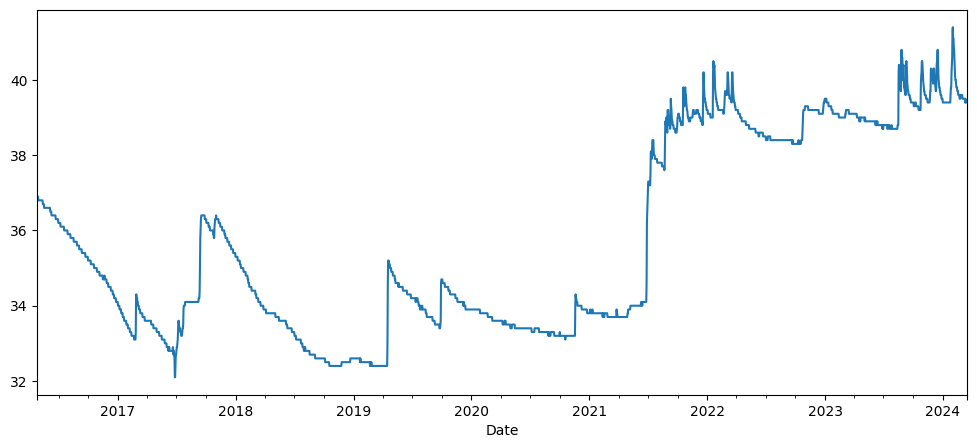

In [295]:
from statsmodels.tsa.arima_model import ARIMA, ARMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

# to determind to look for p and q
daily_auckland_weather['SoilMoist(%)'].plot(figsize=(12,5))

In [296]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    
    labels = ['AD test statistic', 'p-value', '#lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no uni root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to Reject the null hypothesis")
        print("Data has no uni root and is non-stationary")

In [297]:
adf_test(daily_auckland_weather['SoilMoist(%)'])

Augmented Dickey-Fuller Test: 
AD test statistic         -0.864178
p-value                    0.799540
#lags used                15.000000
# observations          2867.000000
critical value (1%)       -3.432633
critical value (5%)       -2.862549
critical value (10%)      -2.567307
Weak evidence against the null hypothesis
Fail to Reject the null hypothesis
Data has no uni root and is non-stationary


In [298]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_size = int(len(daily_auckland_weather) * 0.8)

train, test = daily_auckland_weather['SoilMoist(%)'][:train_size], daily_auckland_weather['SoilMoist(%)'][train_size:]
model = ARIMA(train, order=(0, 1, 1)) 
results = model.fit()

forecast = results.forecast(steps=len(test))


rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Root Mean Squared Error (RMSE): 0.986679040314625
Mean Absolute Error (MAE): 0.8292894280762578
Mean Squared Error (MSE): 0.9735355285961894
R2 Score: -2.2439082805189523


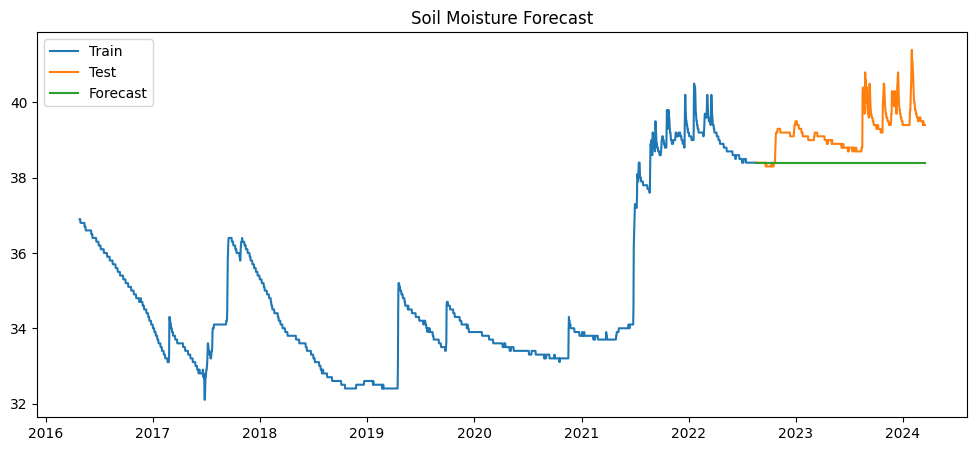

In [299]:
plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='best')
plt.title('Soil Moisture Forecast')
plt.show()

SARIMA RMSE: 0.9866788917734884
SARIMA Mean Absolute Error (MAE): 0.8292894280762578
SARIMA Mean Squared Error (MSE): 0.9735355285961894
SARIMA R2 Score: -2.2439082805189523


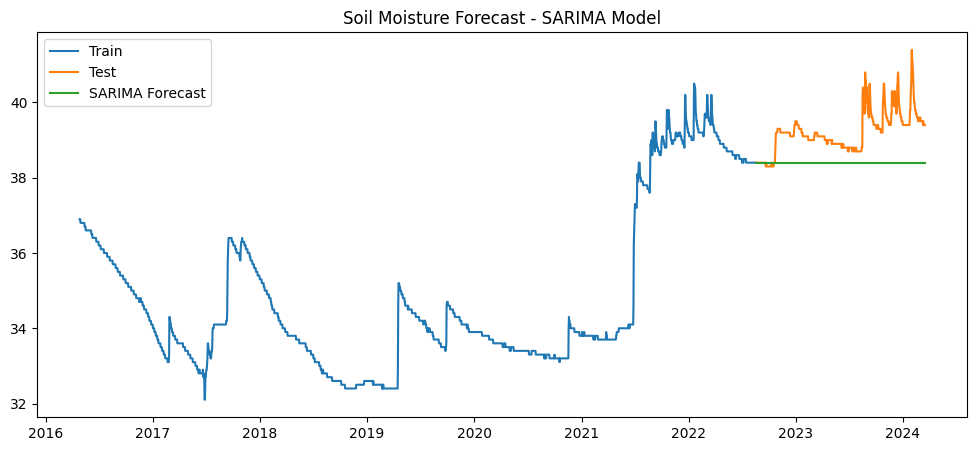

In [301]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(train, order=(0, 1, 1), seasonal_order=(0, 0, 1, 14))
results_sarima = model_sarima.fit()

forecast_sarima = results_sarima.forecast(steps=len(test))
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
mae_sarima = mean_absolute_error(test, forecast)
mse_sarima = mean_squared_error(test, forecast)
r2_sarima = r2_score(test, forecast)
print(f"SARIMA RMSE: {rmse_sarima}")
print("SARIMA Mean Absolute Error (MAE):", mae_sarima)
print("SARIMA Mean Squared Error (MSE):", mse_sarima)
print("SARIMA R2 Score:", r2_sarima)


plt.figure(figsize=(12, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast_sarima, label='SARIMA Forecast')
plt.legend(loc='best')
plt.title('Soil Moisture Forecast - SARIMA Model')
plt.show()